In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read in the image
image = mpimg.imread('C:\\Users\\Rolston Dsouza\\Downloads\\Tensorflow\\self dr(maj prx)\\CV\\parappadi_nitte_1.jpg')

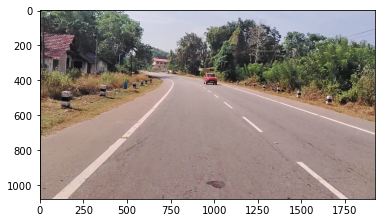

In [3]:
plt.imshow(image)

In [4]:
# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.


ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

In [5]:
# Define our color criteria

red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [6]:
image.shape

(1080, 1920, 3)

In [7]:
# Define a triangle region of interest 
left_bottom = [0, 1080]
right_bottom = [1920, 1080]
apex = [1920/2, 350]

In [8]:
#fitting the images

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [9]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [10]:
# Find the region inside the lines

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [11]:
# Mask color selection

color_select[color_thresholds] = [0,0,0]

In [12]:
# Find where image is both colored right and in the region

line_image[~color_thresholds & region_thresholds] = [255,0,0]

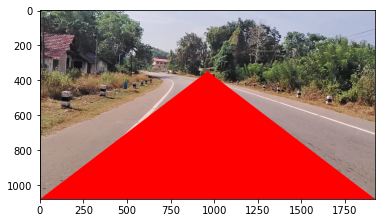

In [16]:
# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)